<a href="https://colab.research.google.com/github/luivazmanso7/Analise-Mercado-Mobile/blob/main/Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Análise de Dados de Smartphones

**Autor:** Lui Manso
**Data:** Agosto de 2024

## Descrição

Este notebook realiza uma análise dos dados de vendas dos 120 modelos de celulares mais vendidos no mundo. O foco da análise está na comparação das unidades vendidas pelas principais fabricantes globais, Apple e Samsung, que dominam o mercado de smartphones.

## Objetivo

- Comparar o desempenho de vendas entre as fabricantes Apple e Samsung ao longo dos anos.
- Visualizar as tendências de mercado com base nas unidades vendidas.

## Ferramentas Utilizadas

- **Linguagem:** Python
- **Bibliotecas:** Pandas, Seaborn, Matplotlib



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#agtitle  #vizualizacao da tabela
df=pd.read_csv('/content/Top 120 Best-Selling Phones.csv')
display(df)

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
...,...,...,...,...,...,...,...
115,116,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7
116,117,Samsung,Samsung Galaxy S24,Touchscreen,True,2024,2.4
117,118,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2
118,119,Google,Pixel & Pixel XL,Touchscreen,True,2016,2.1


In [ ]:
#verificacao de valores nulos
df.info
df.isnull().sum()


,0
Rank,0
Manufacturer,0
Model,0
Form Factor,0
Smartphone?,0
Year,0
Units Sold (million ),0


### Comparação de Unidades Vendidas.
Neste estudo, foram analisados os dados de vendas das principais fabricantes de smartphones, com um foco nas empresas Apple e Samsung, que são duas das marcas mais dominantes e influentes no mercado global de dispositivos móveis.

No contexto da análise de mercado de smartphones, este estudo foca na comparação das unidades vendidas pelas duas maiores fabricantes globais, Apple e Samsung. Essas empresas representam pilares distintos no ecossistema mobile, e a comparação de suas vendas acumuladas ao longo dos anos fornece insights críticos sobre a dinâmica competitiva entre elas.

O gráfico gerado ilustra a soma total das unidades vendidas por cada fabricante, conforme registrado nos dados. A abordagem metodológica incluiu a filtragem dos dados para incluir apenas os dispositivos fabricados pela Apple e Samsung, seguida de uma agregação das unidades vendidas, o que permitiu a quantificação do volume total comercializado por cada uma.


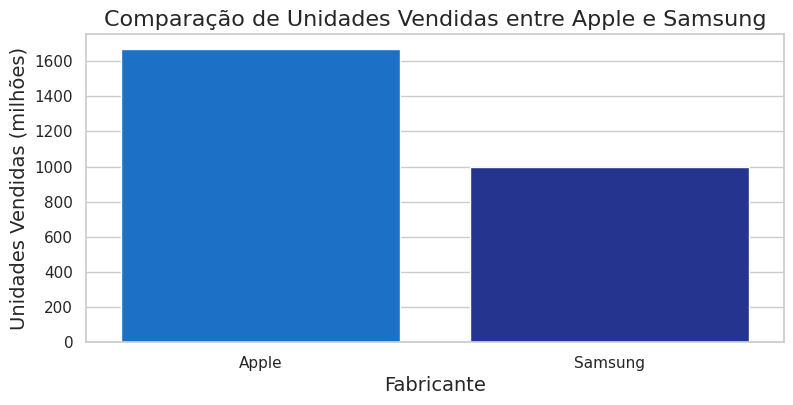

In [ ]:
apple_samsung = df[df['Manufacturer'].isin(['Apple', 'Samsung'])]

comparacao_de_vendas = apple_samsung.groupby('Manufacturer')['Units Sold (million )'].sum().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(9, 4))
sns.barplot(x='Manufacturer', y='Units Sold (million )', data=comparacao_de_vendas, palette=['#0071e3', '#1428a0'])

plt.title('Comparação de Unidades Vendidas entre Apple e Samsung', fontsize=16)
plt.xlabel('Fabricante', fontsize=14)
plt.ylabel('Unidades Vendidas (milhões)', fontsize=14)
plt.show()



### Análise Temporal da Evolução das Vendas: Apple vs Samsung

A análise temporal das vendas de smartphones fornece uma visão sobre as estratégias de mercado e a eficácia competitiva dessas duas empresas da tecnologia ao longo dos anos. Através da agregação anual dos dados de vendas, foi possível traçar uma curva de tendência para cada fabricante, permitindo uma comparação precisa das dinâmicas de mercado que influenciaram suas trajetórias.

Os dados foram agrupados por ano e fabricante, e as unidades vendidas foram somadas para cada período, gerando uma matriz temporal que revela as flutuações nas vendas de ambos os fabricantes. A visualização foi realizada através de uma análise de séries temporais, utilizando um gráfico de linhas para destacar as tendências e os pontos de inflexão ao longo do tempo.

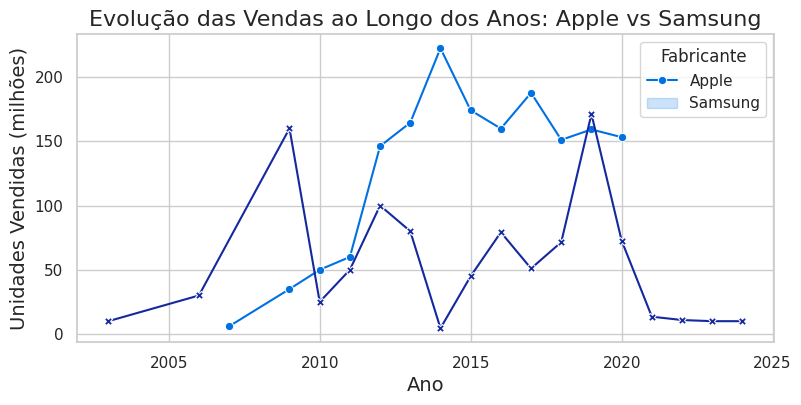

In [ ]:
evolucao = apple_samsung.groupby(['Year', 'Manufacturer'])['Units Sold (million )'].sum().unstack()



sns.set(style="whitegrid")
plt.figure(figsize=(9, 4))
sns.lineplot(data=evolucao, markers=True, dashes=False, palette=['#0071e3', '#1428a0'])

plt.title('Evolução das Vendas ao Longo dos Anos: Apple vs Samsung', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Unidades Vendidas (milhões)', fontsize=14)
plt.legend(title='Fabricante', labels=['Apple', 'Samsung'])
plt.show()



### Análise da Participação de Mercado dos Principais Fabricantes de Smartphones

 filtrando os dados para incluir apenas as entradas relacionadas a smartphones. os dados foram agrupados por ano e fabricante para calcular a soma das unidades vendidas por fabricante em cada ano.

Para entender melhor a distribuição de mercado, calculamos a participação de mercado de cada fabricante. Isso é feito dividindo o total de unidades vendidas por fabricante pelo total de unidades vendidas no ano correspondente. Este cálculo resulta em uma tabela que mostra a participação percentual de cada fabricante no mercado global de smartphones.



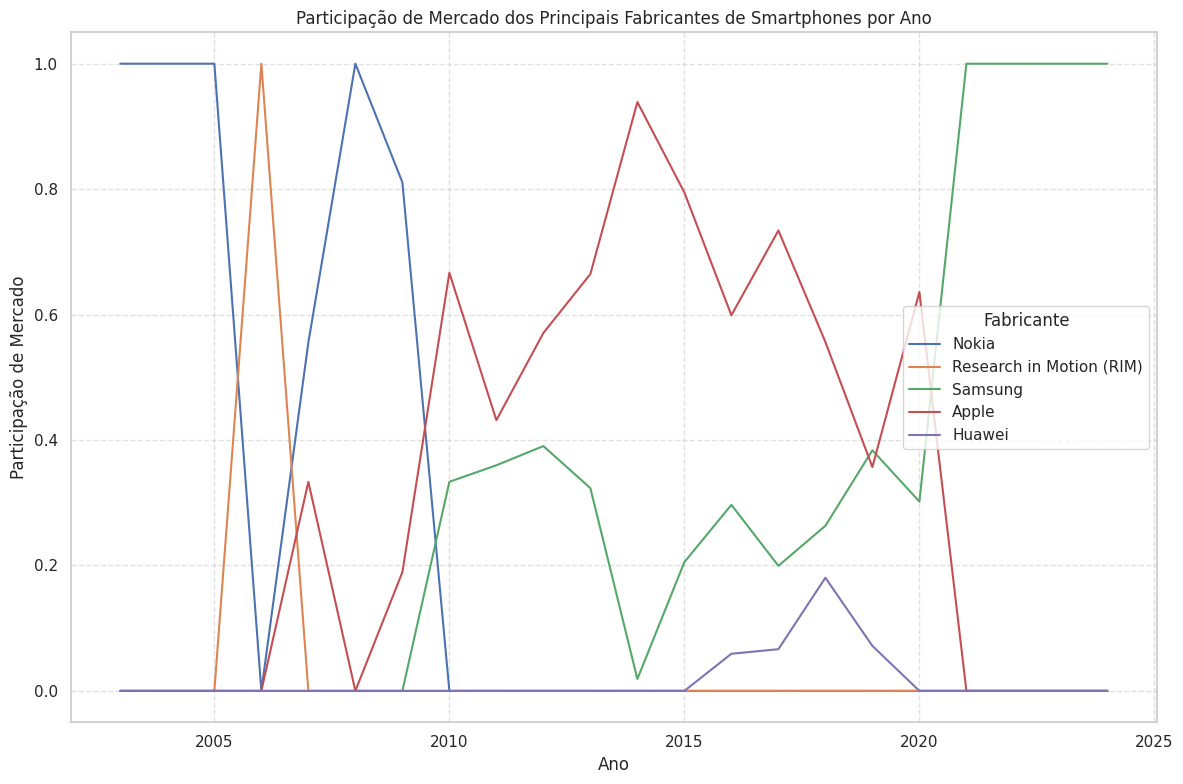

In [ ]:


smartphone_ano_fabricante = df[df['Smartphone?']].groupby(['Year', 'Manufacturer'])['Units Sold (million )'].sum().unstack(fill_value=0)

participacao_por_ano = smartphone_ano_fabricante.divide(smartphone_ano_fabricante.sum(axis=1), axis=0)

top_manufacturers = participacao_por_ano.max().nlargest(5).index
participacao_top_fabricantes = participacao_por_ano[top_manufacturers]

participacao_top_fabricantes.plot(kind='line', figsize=(12, 8))

plt.title('Participação de Mercado dos Principais Fabricantes de Smartphones por Ano')
plt.xlabel('Ano')
plt.ylabel('Participação de Mercado')
plt.legend(title='Fabricante')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
